In [1]:
import networkx as nx
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import det
from numpy import cov

In [2]:
data = sio.loadmat('Market.mat')['DI']
data.shape

(7, 190, 12)

In [3]:
T = 7
P = 190
N = 12

In [4]:
#the nodes are the companies:
vertex_set = [i for i in range(12)]
G = nx.DiGraph()
for v in vertex_set:
    G.add_node(v)

In [5]:
all_nodes = set(vertex_set)

In [6]:
I = np.zeros((N,N))

In [7]:
T = 7
P = 190
N = 12

In [8]:
#the nodes are the companies:
vertex_set = [i for i in range(12)]
G = nx.DiGraph()
for v in vertex_set:
    G.add_node(v)

In [9]:
all_nodes = set(vertex_set)

In [10]:
I = np.zeros((N,N))

In [11]:
for i in vertex_set:
    for j in vertex_set:
        if i == j:
            continue
        else:
            s_x = {i}
            s_y = {j}
            s_z = all_nodes - s_x - s_y
            x_t = data[:,:,i]  #company i
            y_t = data[:,:,j]  #company j

            z_t = [] #remaining companies
            for k in s_z:
                z_t.append(data[:,:,k])
                
            z_t = np.asarray(z_t)
            
            k = 0
            for t in np.arange(1,T+1):
                m1 = np.concatenate( (y_t[:t+1,:].reshape(-1,P),z_t[:,:t,:].reshape(-1,P)))
                m2 = np.concatenate( (x_t[:t,:].reshape(-1,P) , np.concatenate((y_t[:t,:].reshape(-1,P),z_t[:,:t,:].reshape(-1,P)))) )
                m3 = np.concatenate( (y_t[:t,:].reshape(-1,P),z_t[:,:t,:].reshape(-1,P)))
                m4 = np.concatenate( (x_t[:t,:].reshape(-1,P) , np.concatenate((y_t[:t+1,:].reshape(-1,P),z_t[:,:t,:].reshape(-1,P)))) )
        
                c1 = cov(m1)
                d1 = det(c1)

                c2 = cov(m2)
                d2 = det(c2)

                c3 = cov(m3)
                d3 = det(c3)

                c4 = cov(m4)                
                d4 = det(c4)
                
                k += (np.log(d1) + np.log(d2) - np.log(d3) - np.log(d4))
                
            DI = 0.5 * k
            I[i,j] = DI

In [12]:
I

array([[0.        , 0.28222781, 0.25001481, 0.28977971, 0.4662252 ,
        0.49941287, 0.63746525, 0.67825494, 0.55202974, 0.38308353,
        0.38040282, 0.1750656 ],
       [0.33695624, 0.        , 0.25050208, 0.4276407 , 0.31911559,
        0.25526359, 0.08660567, 0.29054143, 0.2434451 , 0.19130077,
        0.17433475, 0.15930557],
       [0.21173331, 0.38404674, 0.        , 0.16129767, 0.57070903,
        0.14265086, 0.23366249, 0.39982249, 0.24913004, 0.4364036 ,
        0.34513594, 0.27613574],
       [0.20028576, 0.18118151, 0.31836535, 0.        , 0.27679109,
        0.15862578, 0.23834218, 0.30862763, 0.42021785, 0.25240935,
        0.20675709, 0.27745761],
       [0.34378746, 0.27428976, 0.26614142, 0.33643824, 0.        ,
        0.2648248 , 0.31651899, 0.29901873, 0.33741943, 0.39862906,
        0.36485287, 0.24712631],
       [0.34997715, 0.41537613, 0.20049108, 0.34020751, 0.30044046,
        0.        , 0.19748386, 0.63530744, 0.223722  , 0.4245407 ,
        0.24797238,

In [13]:
def edge(a):
    if a > 0.6:
        return 1
    else:
        return 0

detect__edge = np.vectorize(edge)
A_M =  np.vectorize(edge)( np.matrix(I) )

In [14]:
A_M

matrix([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

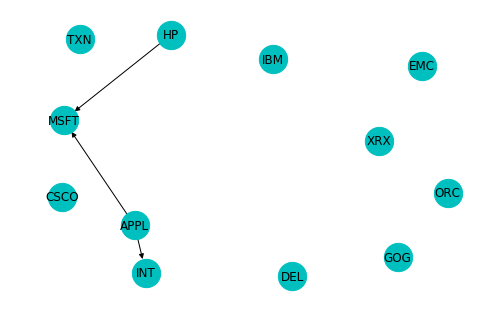

In [15]:
mapping={0:'APPL',1:'CSCO',2:'DEL',3:'EMC',4:'GOG' , 5:'HP', 6:'INT', 7:'MSFT', 8:'ORC', 9:'IBM', 10:'TXN', 11:'XRX'}
G=nx.from_numpy_matrix(A_M,create_using=nx.MultiDiGraph())
H=nx.relabel_nodes(G,mapping)
pos=nx.spring_layout(H,scale=2,k= 0.8, iterations=10) # double distance between all nodes
nx.draw(H,pos = pos,with_labels=True,node_size=800,node_color='C')